In [2]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
import pandas as pd

# Gantikan backslash (\) dengan dua backslash (\\) atau gunakan huruf 'r' untuk raw string
file_path = r"C:\Users\HAKIMHAMRI\Documents\UMK KAMPUS KOTA\TAHUN 2 SEM 4\AI 2\Project 1\LSTM-Project\FBMKLCI.csv"

# Membaca fail CSV
df = pd.read_csv(file_path)

# Paparkan 5 baris pertama
df.head()


,time,open,high,low,close,MA,Volume
0,1982-01-01,378.76001,387.06000,220.74001,291.44000,NaN,NaN
1,1983-01-03,288.60999,421.29999,284.76999,401.60001,NaN,NaN
2,1984-01-02,408.95001,426.79001,289.32001,303.54999,NaN,NaN
3,1985-01-01,298.70999,320.47000,217.63000,233.47000,NaN,NaN
4,1986-01-01,219.75000,272.03000,169.83000,252.42999,NaN,NaN


In [5]:
print(df.columns)


Index(['time', 'open', 'high', 'low', 'close', 'MA', 'Volume'], dtype='object')


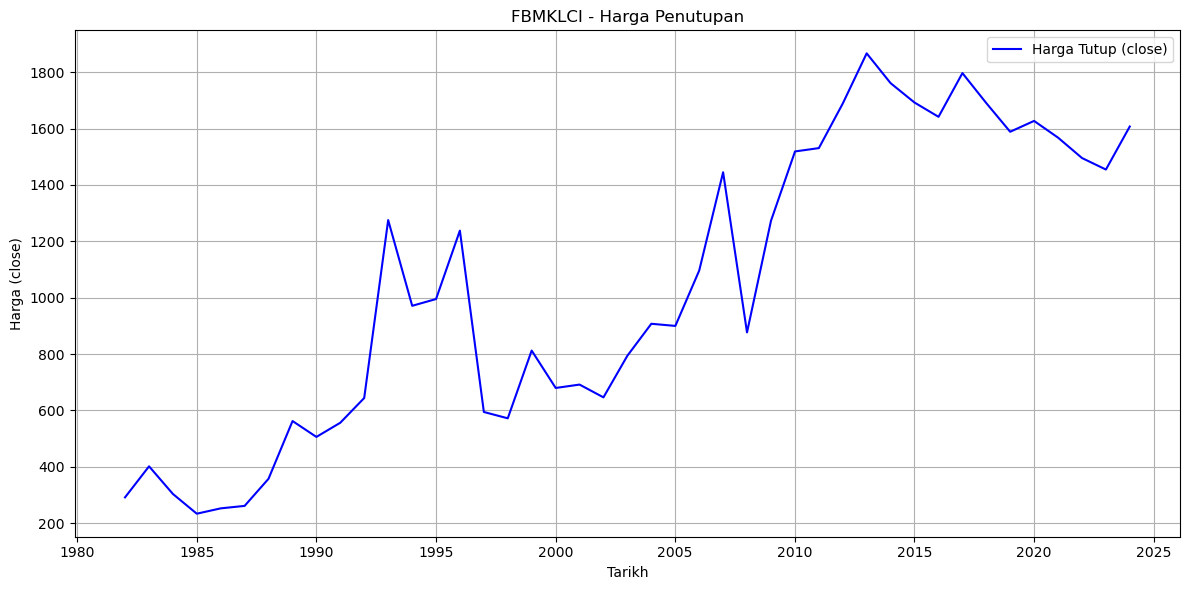

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan kolum 'time' ditukar ke datetime jika belum
df['time'] = pd.to_datetime(df['time'])

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['close'], label='Harga Tutup (close)', color='blue')
plt.title("FBMKLCI - Harga Penutupan")
plt.xlabel("Tarikh")
plt.ylabel("Harga (close)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
df

,time,open,high,low,close,MA,Volume
0,1982-01-01,378.76001,387.06000,220.74001,291.44000,NaN,NaN
1,1983-01-03,288.60999,421.29999,284.76999,401.60001,NaN,NaN
2,1984-01-02,408.95001,426.79001,289.32001,303.54999,NaN,NaN
3,1985-01-01,298.70999,320.47000,217.63000,233.47000,NaN,NaN
4,1986-01-01,219.75000,272.03000,169.83000,252.42999,NaN,NaN
5,1987-01-01,251.16000,470.16000,223.12000,261.17999,NaN,NaN
6,1988-01-01,260.51001,377.39001,254.78000,357.38000,NaN,NaN
7,1989-01-02,357.29999,564.65002,357.29999,562.28003,NaN,NaN
8,1990-01-01,571.85999,632.21997,459.07999,505.92001,NaN,NaN
9,1991-01-01,501.23001,635.02002,470.41000,556.21997,NaN,NaN


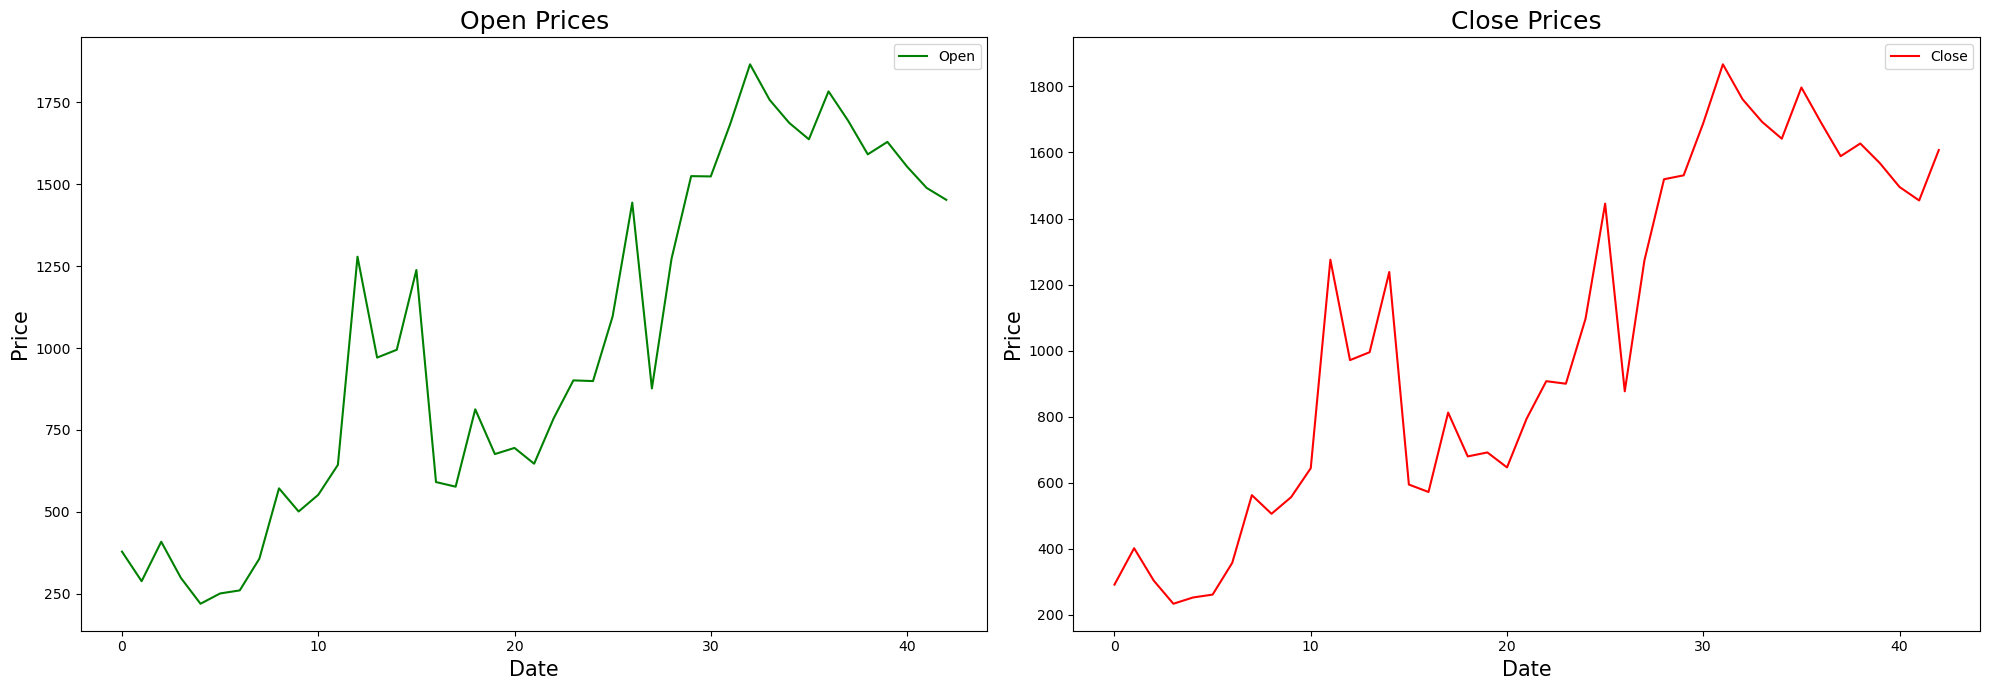

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots
fg, ax = plt.subplots(1, 2, figsize=(20, 7))

# Plot Open Prices
ax[0].plot(gstock_data['open'], label='Open', color='green')
ax[0].set_xlabel('Date', size=15)
ax[0].set_ylabel('Price', size=15)
ax[0].set_title('Open Prices', size=18)
ax[0].legend()

# Plot Close Prices
ax[1].plot(gstock_data['close'], label='Close', color='red')
ax[1].set_xlabel('Date', size=15)
ax[1].set_ylabel('Price', size=15)
ax[1].set_title('Close Prices', size=18)
ax[1].legend()

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Extract the 'close' prices
close_prices = data['close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Create sequences for training
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
train_seq, test_seq = X[:train_size], X[train_size:]
train_labels, test_labels = y[:train_size], y[train_size:]

# Step 1: Building the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(0.1)) 
model.add(LSTM(units=50))
model.add(Dense(2))  # Output layer with 2 units

# Step 2: Compiling the Model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Step 3: Displaying the Model Summary
model.summary()


C:\Users\HAKIMHAMRI\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                 │ (None, 10, 50)        │       10,400 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_1 (Dropout)           │ (None, 10, 50)        │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lstm_3 (LSTM)                 │ (None, 50)            │       20,200 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 2)             │          102 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 30,702 (119.93 KB)

 Trainable params: 30,702 (119.93 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


C:\Users\HAKIMHAMRI\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.4906
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.4253
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3658
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.3165
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2634
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2189
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1766
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1389
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1061
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0723
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0510
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0363
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0365
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0476
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0606
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━

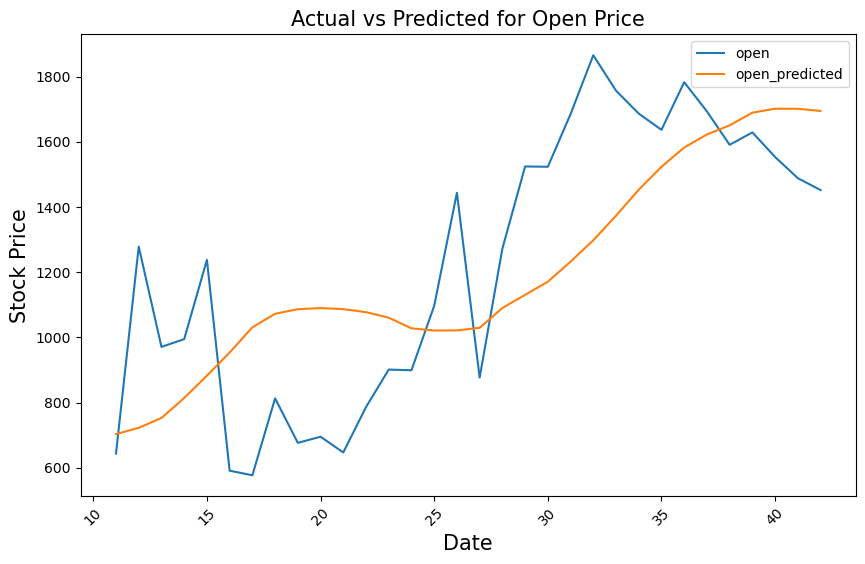

In [12]:
# Extract the 'open' prices
open_prices = gstock_data['open'].values.reshape(-1, 1)

# Normalize the data
MMS_open = MinMaxScaler(feature_range=(0, 1))
scaled_open = MMS_open.fit_transform(open_prices)

# Create sequences for training (example with 10 time steps)
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X_open, y_open = create_dataset(scaled_open, time_step)

# Reshape for LSTM
X_open = X_open.reshape(X_open.shape[0], X_open.shape[1], 1)

# Build and train the LSTM model for open prices
model_open = Sequential()
model_open.add(LSTM(units=50, return_sequences=True, input_shape=(X_open.shape[1], 1)))
model_open.add(Dropout(0.1))
model_open.add(LSTM(units=50))
model_open.add(Dense(1))
model_open.compile(loss='mean_squared_error', optimizer='adam')
model_open.fit(X_open, y_open, epochs=100, batch_size=32)

# Make predictions for the last 202 time steps
test_predictions_open = model_open.predict(X_open[-202:])  # Last 202 predictions
test_inverse_predicted_open = MMS_open.inverse_transform(test_predictions_open)

# Create DataFrame for predicted values
predicted_df = pd.DataFrame({
    'open_predicted': test_inverse_predicted_open.flatten()
}, index=gstock_data.index[-len(test_inverse_predicted_open):])

# Combine with the original data
gs_slic_data = pd.concat([gstock_data.iloc[-len(test_inverse_predicted_open):].copy(), predicted_df], axis=1)

# Plotting Actual vs Predicted Open Prices
plt.figure(figsize=(10, 6))
gs_slic_data[['open', 'open_predicted']].plot(ax=plt.gca())
plt.xticks(rotation=45)
plt.xlabel('Date', size=15)
plt.ylabel('Stock Price', size=15)
plt.title('Actual vs Predicted for Open Price', size=15)
plt.show()


In [13]:
high_prices = df.loc[:, 'high'].values  # Use .values instead of as_matrix()
low_prices = df.loc[:, 'low'].values    # Use .values instead of as_matrix()
# Calculate mid prices
mid_prices = (high_prices + low_prices) / 2.0
# Split the data into training and testing sets
train_data = mid_prices[:11000]  # First 11,000 entries for training
test_data = mid_prices[11000:]    # Remaining entries for testing
# Display the sizes of the training and testing datasets
print(f"Training data size: {len(train_data)}")
print(f"Testing data size: {len(test_data)}")

Training data size: 43
Testing data size: 0


In [7]:
#Splitting the dataset into training (70%) and testing (30%)


import pandas as pd
train = pd.DataFrame(data[0:int(len(data)*0.70)])  
test = pd.DataFrame(data[int(len(data)*0.70):])

# Papar saiz dataset
print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (30, 7)
Test shape: (13, 7)


In [5]:
train.head

<bound method NDFrame.head of           time        open        high         low       close  MA  Volume
0   1982-01-01   378.76001   387.06000   220.74001   291.44000 NaN     NaN
1   1983-01-03   288.60999   421.29999   284.76999   401.60001 NaN     NaN
2   1984-01-02   408.95001   426.79001   289.32001   303.54999 NaN     NaN
3   1985-01-01   298.70999   320.47000   217.63000   233.47000 NaN     NaN
4   1986-01-01   219.75000   272.03000   169.83000   252.42999 NaN     NaN
5   1987-01-01   251.16000   470.16000   223.12000   261.17999 NaN     NaN
6   1988-01-01   260.51001   377.39001   254.78000   357.38000 NaN     NaN
7   1989-01-02   357.29999   564.65002   357.29999   562.28003 NaN     NaN
8   1990-01-01   571.85999   632.21997   459.07999   505.92001 NaN     NaN
9   1991-01-01   501.23001   635.02002   470.41000   556.21997 NaN     NaN
10  1992-01-01   552.15997   664.92999   538.00000   643.96002 NaN     NaN
11  1993-01-01   643.41998  1275.31990   611.16998  1275.31990 NaN    

In [6]:
test.head()

,time,open,high,low,close,MA,Volume
30,2012-01-03,1523.6000,1688.95,1502.0900,1688.95,NaN,NaN
31,2013-01-02,1685.1500,1882.20,1597.0000,1866.96,NaN,NaN
32,2014-01-02,1865.7300,1896.23,1671.8199,1761.25,NaN,NaN
33,2015-01-02,1757.1500,1867.53,1503.6801,1692.51,NaN,NaN
34,2016-01-04,1686.8199,1729.13,1600.9200,1641.73,NaN,NaN


In [10]:
#Using MinMax scaler for normalization of the dataset

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [11]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [12]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.04468649],
       [0.12960394],
       [0.05402155],
       [0.        ],
       [0.01461541],
       [0.0213604 ],
       [0.0955167 ],
       [0.25346502],
       [0.21001959],
       [0.24879359],
       [0.31642849],
       [0.80311572],
       [0.56869095],
       [0.58716062],
       [0.77431664],
       [0.27825571],
       [0.26089603],
       [0.44621743],
       [0.3439326 ],
       [0.35318287],
       [0.3182477 ],
       [0.43204138],
       [0.51952576],
       [0.51363642],
       [0.665071  ],
       [0.93393768],
       [0.49587592],
       [0.80115782],
       [0.99088849],
       [1.        ]])

In [23]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [24]:
x_train.shape

(0,)

In [27]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [28]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [30]:
model = Sequential()

In [32]:
print(x_train.shape)

(0,)


In [5]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\HAKIMHAMRI\Documents\UMK KAMPUS KOTA\TAHUN 2 SEM 4\AI 2\Project 1\LSTM-Project\FBMKLCI.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
print("DataFrame Head:")
print(df.head())

# Calculate the mid prices from the highest and lowest
high_prices = df['high'].values  # Use .values to get the numpy array
low_prices = df['low'].values    # Use .values to get the numpy array
mid_prices = (high_prices + low_prices) / 2.0

# Add mid prices to the DataFrame for reference
df['mid'] = mid_prices

# Display the DataFrame with mid prices
print("\nDataFrame with Mid Prices:")
print(df[['time', 'high', 'low', 'mid']].head())


DataFrame Head:
         time       open       high        low      close  MA  Volume
0  1982-01-01  378.76001  387.06000  220.74001  291.44000 NaN     NaN
1  1983-01-03  288.60999  421.29999  284.76999  401.60001 NaN     NaN
2  1984-01-02  408.95001  426.79001  289.32001  303.54999 NaN     NaN
3  1985-01-01  298.70999  320.47000  217.63000  233.47000 NaN     NaN
4  1986-01-01  219.75000  272.03000  169.83000  252.42999 NaN     NaN

DataFrame with Mid Prices:
         time       high        low         mid
0  1982-01-01  387.06000  220.74001  303.900005
1  1983-01-03  421.29999  284.76999  353.034990
2  1984-01-02  426.79001  289.32001  358.055010
3  1985-01-01  320.47000  217.63000  269.050000
4  1986-01-01  272.03000  169.83000  220.930000


In [6]:
train_data = mid_prices[:11000]
test_data = mid_prices[11000:]

In [7]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Contoh: data rawak
train_data = np.random.rand(12000, 1)  # contoh data 12000 baris, 1 kolum

# Inisialisasi scaler
scaler = MinMaxScaler()

# Penormalan berasaskan window
smoothing_window_size = 2500
for di in range(0, 10000, smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size, :])
    train_data[di:di+smoothing_window_size, :] = scaler.transform(train_data[di:di+smoothing_window_size, :])

# Normalize bahagian akhir yang tertinggal
scaler.fit(train_data[di+smoothing_window_size:, :])
train_data[di+smoothing_window_size:, :] = scaler.transform(train_data[di+smoothing_window_size:, :])
